The Tony Awards are the most prestigious award ceremonies for Broadway plays and musicals. They are roughly equivalent to the Grammys, Academy Awards, and Emmys. Two of the most important awards are for Best Musical and Best Play.

I decided to figure out--how important are these awards? Is there some recognizable financial gain for their performances after receiving a Tony Award?

First, I used the official Tony Award website to determine the winners since 2001 for each of these awards. I then put them into a python dictionary and put the corresponding month of the start of Tony Award season.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
broadway = pd.read_csv("broadway.csv")

In [9]:
import datetime
parsedt = lambda x: datetime.datetime.strptime(x, '%m/%d/%Y')
broadway['Full'] = broadway['Full'].apply(parsedt)
play_winners = {
    'Proof': "06/01/2001",
    'The Goat, Or Who Is Sylvia?': "06/01/2002",
    'Take Me Out': "06/01/2003",
    'I Am My Own Wife': "06/01/2004",
    "Doubt": "06/01/2005",
    'The History Boys': "06/01/2006",
    'The Coast Of Utopia': "06/01/2007",
    'August: Osage County': "06/01/2008",
    'God Of Carnage': "06/01/2009",
    'Red': "06/01/2010",
    'War Horse': "06/01/2011",
    'Clybourne Park': "06/01/2012",
    'Vanya And Sonia And Masha And Spike': "06/01/2013",
    "All The Way": "06/01/2014",
    'The Curious Incident Of The Dog In The Night-Time': "06/01/2015",
    'The Humans': "06/01/2016"
}

musical_winners = {
    'The Producers': "06/01/2001",
    'Thoroughly Modern Millie': "06/01/2002",
    'Hairspray': "06/01/2003",
    'Avenue Q': "06/01/2004",
    "Monty Python'S Spamalot": "06/01/2005",
    'Jersey Boys': "06/01/2006",
    'Spring Awakening': "06/01/2007",
    'In The Heights': "06/01/2008",
    'Billy Elliot: The Musical': "06/01/2009",
    'Memphis': "06/01/2010",
    'The Book Of Mormon': "06/01/2011",
    'Once': "06/01/2012",
    'Kinky Boots': "06/01/2013",
    "A Gentleman'S Guide To Love And Murder": "06/01/2014",
    'Fun Home': "06/01/2015",
    'Hamilton': "06/01/2016"
}

Now, I want to build plots that show the dividing line between before Tony season and after. These are instructive to see the overall effect of a play receiving a Tony on different metrics.

In [10]:
def plot_by_tony_award_and_y_val(tony_str, tony, y_val, y_val_str):
    f, axarr = plt.subplots(4, 4)
    f.set_figheight(15)
    f.set_figwidth(15)
    f.suptitle("""{}s' {} Full Before and After Receiving a Tony Award
    (vertical red line denotes Tony award season)""".format(tony_str, y_val_str), fontsize = 20)
    for i, play in enumerate(tony.keys()):
        play_data = broadway[broadway['Name'] == play]
        axarr[i // 4, i % 4].plot(play_data['Full'], play_data[y_val])
        axarr[i // 4, i % 4].axvline(x=parsedt(tony[play]), c='r')
        play_str = play[:30] + "..." if len(play) > 30 else play
        axarr[i // 4, i % 4].set_title("{} ({})".format(play_str, parsedt(tony[play]).year))
        axarr[i // 4, i % 4].axis('off')

    f.subplots_adjust(hspace=0.3)
    plt.show()

First, we take a look at how the percentage capacity changed before and after musicals received a Tony Award.

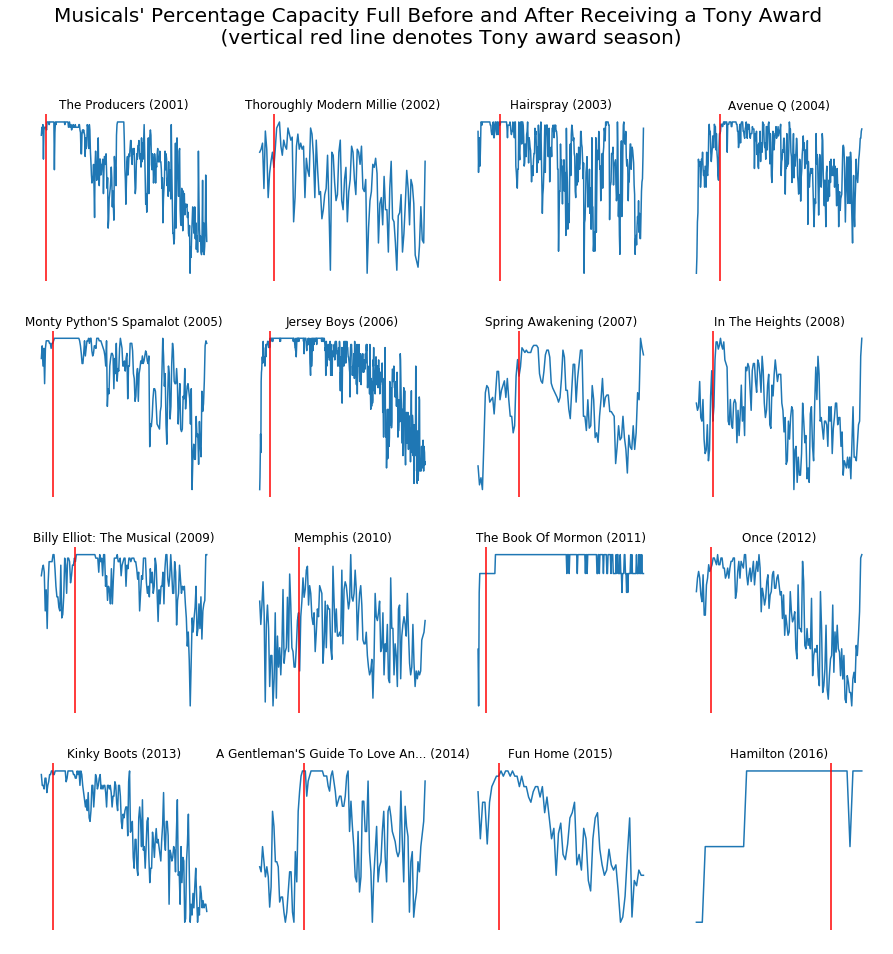

In [11]:
plot_by_tony_award_and_y_val("Musical", musical_winners, "Capacity", "Percentage Capacity")

Next, we look at how the percentage capacity changed before and after plays received a Tony Award.

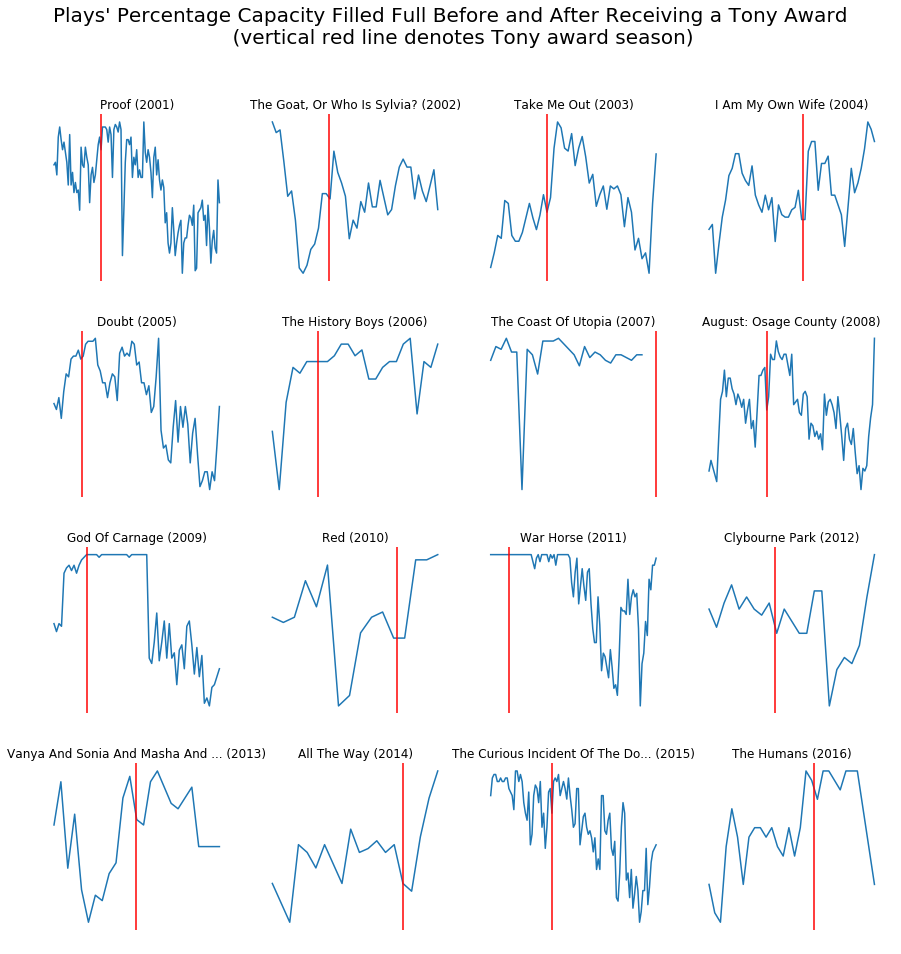

In [12]:
plot_by_tony_award_and_y_val("Play", play_winners, "Capacity", "Percentage Capacity Filled")

Now, we look at how the gross income changed before and after musicals received a Tony Award.

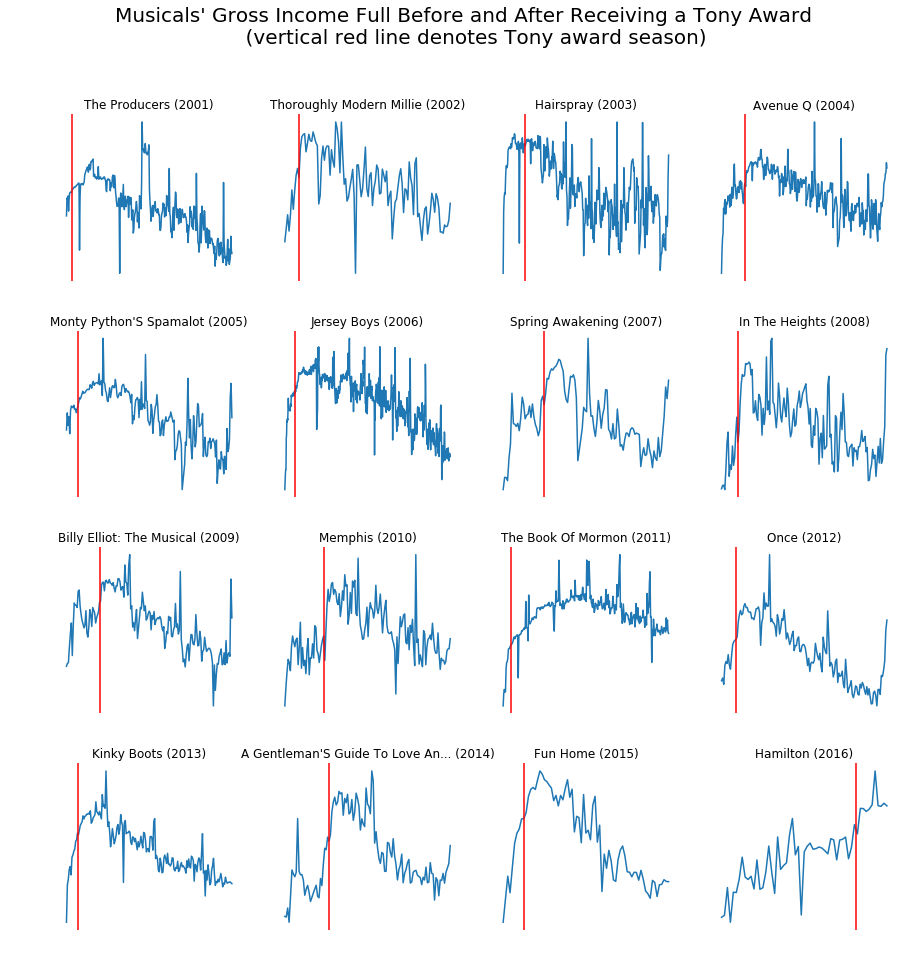

In [13]:
plot_by_tony_award_and_y_val("Musical", musical_winners, "Gross", "Gross Income")

Now, we look at how the gross income changed before and after plays received a Tony Award.

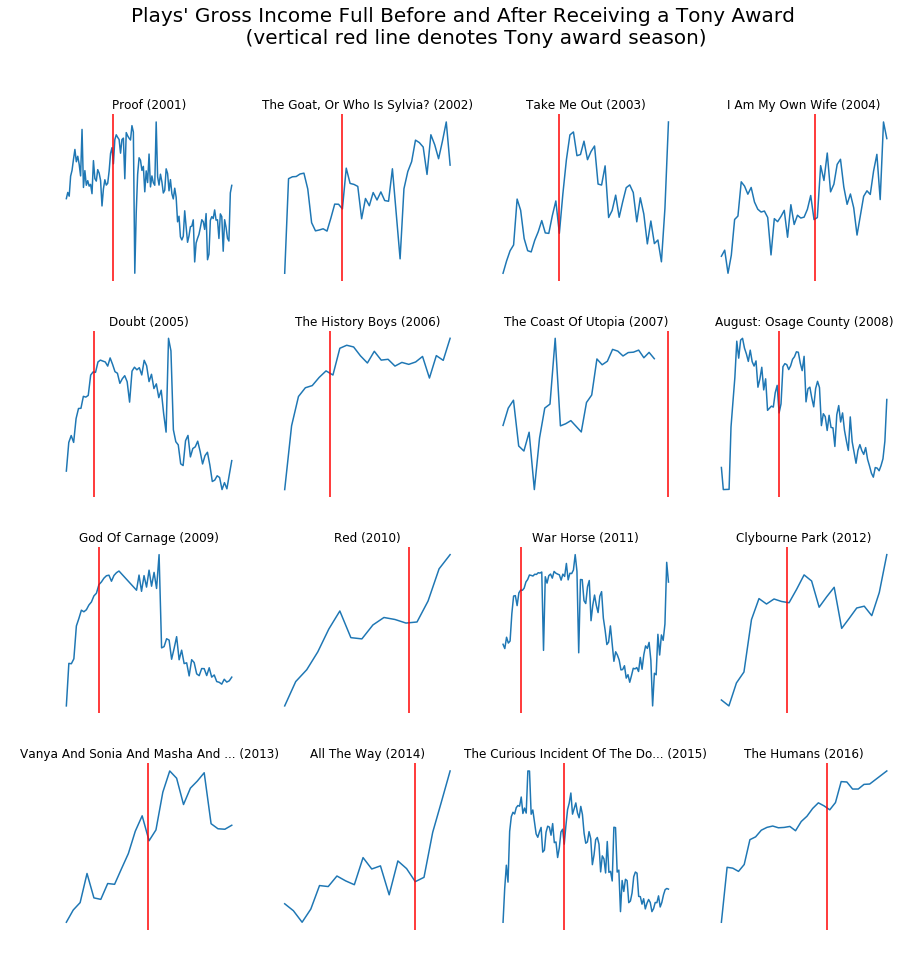

In [14]:
plot_by_tony_award_and_y_val("Play", play_winners, "Gross", "Gross Income")

These are pretty to look at and all--but can we actually see the change in average weekly gross income from the month before receiving the Tony Award to the month after?

In [15]:
import numpy as np
def gross_increase_bar_by_tony_award(tony_str, tony):
    fig, ax = plt.subplots()
    plt.title("""{}s' Gross Income Percentage Increase The Month After Receiving a Tony Award""".format(tony_str), fontsize = 20)
    y = []
    for i, play in enumerate(tony.keys()):
        play_data = broadway[broadway['Name'] == play]
        before = play_data[play_data['Full'] < parsedt(tony[play])].tail(4)['Gross'].mean()
        after = play_data[play_data['Full'] > parsedt(tony[play])].head(4)['Gross'].mean()
        y.append(after / before)
    fig.set_figwidth(15)
    fig.set_figheight(10)
    ax.barh(np.arange(16), (np.array(y) - 1) * 100)
    ax.set_yticks(np.arange(16))
    ax.set_yticklabels(tony.keys())
    ax.invert_yaxis()  # labels read top-to-bottom
    plt.show()
    return np.array(y) - 1

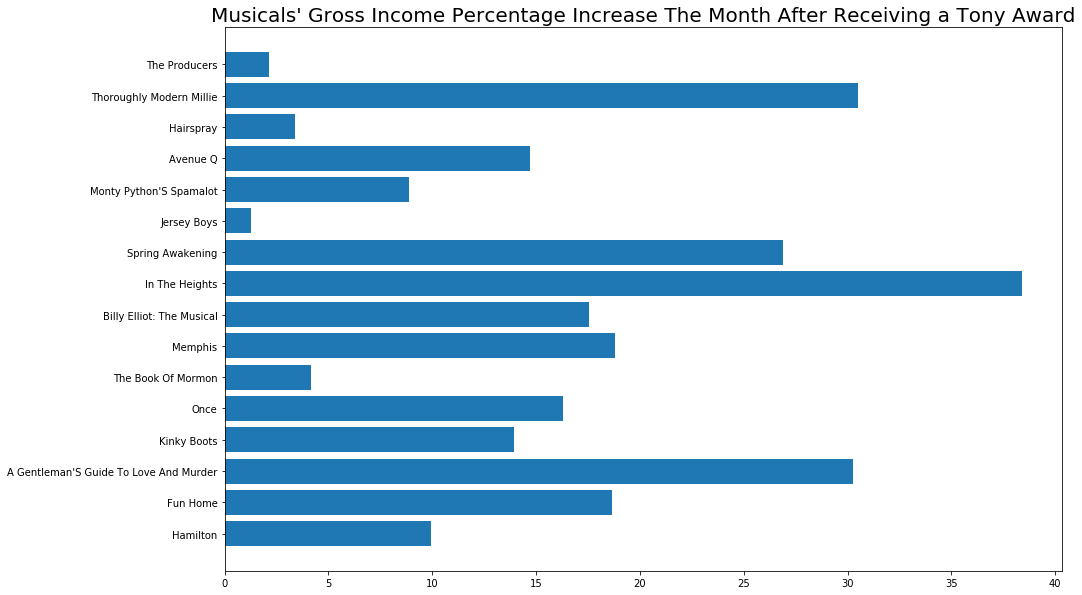

In [16]:
musical_increases = gross_increase_bar_by_tony_award("Musical", musical_winners)

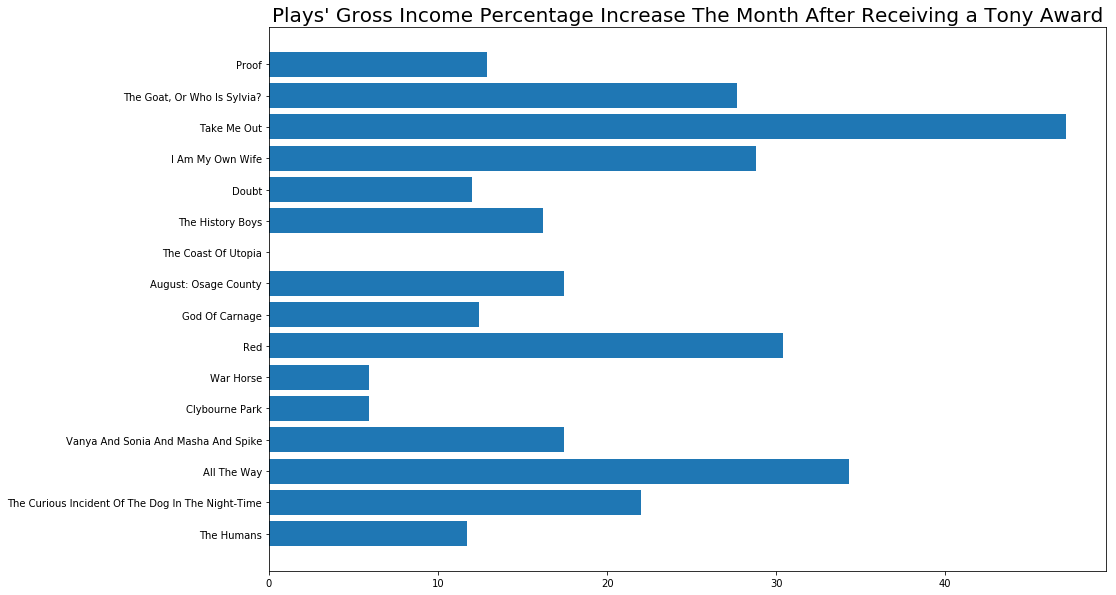

In [17]:
play_increases = gross_increase_bar_by_tony_award("Play", play_winners)

And, finally, we look at the average increase in aggregate for both musicals and plays.

/Users/cclark-work/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


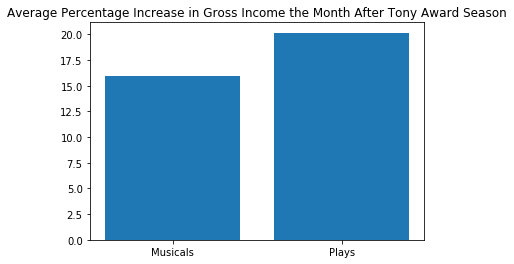

In [24]:
y = np.array([musical_increases.mean(), play_increases[play_increases > 0].mean()])
fig, ax = plt.subplots()
plt.title("Average Percentage Increase in Gross Income the Month After Tony Award Season")
plt.bar(np.arange(2), (y * 100))
ax.set_xticks(np.arange(2))
ax.set_xticklabels(('Musicals', 'Plays'))
plt.show()

Winning a Tony award seems to be worth a 15 - 20% increase for play productions for both Musicals and Plays! This is a pretty interesting finding. Future analysis would check all of the other ones that weren't nominated or awarded a Tony award and see what these relationships are.

Thanks for reading my analysis!